#Exercise (Master DL)






#Exercise

Predict bike rental count (daily) based on the environmental & seasonal settings.

This dataset contains the daily count of rental bikes between years 2011 and 2012 in Capital bikeshare system with the corresponding weather and seasonal information.

Bike-sharing rental process is highly correlated to the environmental and seasonal settings. For instance, weather conditions, precipitation, day of week, season, hour of the day, etc. can affect the rental behaviors.

Conduct the DNN analysis and improve the performance of the model using different archictecture.

Columns Details:
1. Instant - Record Index
2. dteday - Date (Format: YYYY-MM-DD)
3. season - Season (1:   springer, 2: summer, 3: fall, 4: winter)
4. yr - Year (0: 2011,   1:2012)
5. mnth - Month (1 to 12)
6. holiday - Weather day is holiday or not
7. weekday - Day of the week
8. workingday - Working Day: If day is neither weekend nor holiday is 1, otherwise is 0
9. weathersit - Weather Situation (1: Clear/Few clouds; 2: Mist/Cloudy; 3: Light Snow/Light Rain; 4: Heavy Rain/Ice Pallets/Thunderstorm/Snow)
10. temp - Normalized temperature in Celsius. 
11. atemp - Normalized feeling temperature in Celsius. 
12. hum - Normalized humidity. 
13. windspeed - Normalized wind speed. 
14. casual - Count of casual users
15. registered - Count of registered users
16. cnt - Count of total rental bikes including both casual and registeredDeep Neural Network (DNN)

In [1]:
#Mounting our Drive to Google Colab
from google.colab import drive
drive.mount('/drive')

Mounted at /drive


In [2]:
path = '/drive/MyDrive/Colab Notebooks/Deep Learning Lab/Lab12 Bikes/bike.csv'

In [3]:
import pandas as pd
import numpy as np

data = pd.read_csv(path)
data.head()

,instant,dteday,season,yr,mnth,holiday,weekday,workingday,weathersit,temp,atemp,hum,windspeed,casual,registered,cnt
0,1,1/1/2011,1,0,1,0,6,0,2,0.344167,0.363625,0.805833,0.160446,331,654,985
1,2,1/2/2011,1,0,1,0,0,0,2,0.363478,0.353739,0.696087,0.248539,131,670,801
2,3,1/3/2011,1,0,1,0,1,1,1,0.196364,0.189405,0.437273,0.248309,120,1229,1349
3,4,1/4/2011,1,0,1,0,2,1,1,0.200000,0.212122,0.590435,0.160296,108,1454,1562
4,5,1/5/2011,1,0,1,0,3,1,1,0.226957,0.229270,0.436957,0.186900,82,1518,1600


In [4]:
data.shape

(731, 16)

In [5]:
data.columns #easier to copy and paste the column

Index(['instant', 'dteday', 'season', 'yr', 'mnth', 'holiday', 'weekday',
       'workingday', 'weathersit', 'temp', 'atemp', 'hum', 'windspeed',
       'casual', 'registered', 'cnt'],
      dtype='object')

In [6]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 731 entries, 0 to 730
Data columns (total 16 columns):
 #   Column      Non-Null Count  Dtype  
---  ------      --------------  -----  
 0   instant     731 non-null    int64  
 1   dteday      731 non-null    object 
 2   season      731 non-null    int64  
 3   yr          731 non-null    int64  
 4   mnth        731 non-null    int64  
 5   holiday     731 non-null    int64  
 6   weekday     731 non-null    int64  
 7   workingday  731 non-null    int64  
 8   weathersit  731 non-null    int64  
 9   temp        731 non-null    float64
 10  atemp       731 non-null    float64
 11  hum         731 non-null    float64
 12  windspeed   731 non-null    float64
 13  casual      731 non-null    int64  
 14  registered  731 non-null    int64  
 15  cnt         731 non-null    int64  
dtypes: float64(4), int64(11), object(1)
memory usage: 91.5+ KB


In [7]:
data.describe()

,instant,season,yr,mnth,holiday,weekday,workingday,weathersit,temp,atemp,hum,windspeed,casual,registered,cnt
count,731.000000,731.000000,731.000000,731.000000,731.000000,731.000000,731.000000,731.000000,731.000000,731.000000,731.000000,731.000000,731.000000,731.000000,731.000000
mean,366.000000,2.496580,0.500684,6.519836,0.028728,2.997264,0.683995,1.395349,0.495385,0.474354,0.627894,0.190486,848.176471,3656.172367,4504.348837
std,211.165812,1.110807,0.500342,3.451913,0.167155,2.004787,0.465233,0.544894,0.183051,0.162961,0.142429,0.077498,686.622488,1560.256377,1937.211452
min,1.000000,1.000000,0.000000,1.000000,0.000000,0.000000,0.000000,1.000000,0.059130,0.079070,0.000000,0.022392,2.000000,20.000000,22.000000
25%,183.500000,2.000000,0.000000,4.000000,0.000000,1.000000,0.000000,1.000000,0.337083,0.337842,0.520000,0.134950,315.500000,2497.000000,3152.000000
50%,366.000000,3.000000,1.000000,7.000000,0.000000,3.000000,1.000000,1.000000,0.498333,0.486733,0.626667,0.180975,713.000000,3662.000000,4548.000000
75%,548.500000,3.000000,1.000000,10.000000,0.000000,5.000000,1.000000,2.000000,0.655417,0.608602,0.730209,0.233214,1096.000000,4776.500000,5956.000000
max,731.000000,4.000000,1.000000,12.000000,1.000000,6.000000,1.000000,3.000000,0.861667,0.840896,0.972500,0.507463,3410.000000,6946.000000,8714.000000


In [9]:
#Find missing value
missing_value=data[data.isnull().any(axis=1)]
missing_value

,instant,dteday,season,yr,mnth,holiday,weekday,workingday,weathersit,temp,atemp,hum,windspeed,casual,registered,cnt


In [11]:
#Drop columns
data1=data.drop(['instant','dteday'],axis=1)
data1

,season,yr,mnth,holiday,weekday,workingday,weathersit,temp,atemp,hum,windspeed,casual,registered,cnt
0,1,0,1,0,6,0,2,0.344167,0.363625,0.805833,0.160446,331,654,985
1,1,0,1,0,0,0,2,0.363478,0.353739,0.696087,0.248539,131,670,801
2,1,0,1,0,1,1,1,0.196364,0.189405,0.437273,0.248309,120,1229,1349
3,1,0,1,0,2,1,1,0.200000,0.212122,0.590435,0.160296,108,1454,1562
4,1,0,1,0,3,1,1,0.226957,0.229270,0.436957,0.186900,82,1518,1600
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
726,1,1,12,0,4,1,2,0.254167,0.226642,0.652917,0.350133,247,1867,2114
727,1,1,12,0,5,1,2,0.253333,0.255046,0.590000,0.155471,644,2451,3095
728,1,1,12,0,6,0,2,0.253333,0.242400,0.752917,0.124383,159,1182,1341
729,1,1,12,0,0,0,1,0.255833,0.231700,0.483333,0.350754,364,1432,1796


In [12]:
Y = data1 ["cnt"]
X = data1.drop("cnt", axis = 1)

In [13]:
#Split the data
from sklearn.model_selection import train_test_split
X_train, X_test, Y_train, Y_test = train_test_split(X,Y,test_size = 0.2, random_state = 0)


In [14]:
print("X_train shape",X_train.shape)
print("Y_train shape",Y_train.shape)
print("X_test shape", X_test.shape)
print("Y_test shape",Y_test.shape)

X_train shape (584, 13)
Y_train shape (584,)
X_test shape (147, 13)
Y_test shape (147,)


In [15]:
# Normalization
from sklearn.preprocessing import StandardScaler

scaler = StandardScaler()

X_train =  scaler.fit_transform(X_train)
X_test = scaler.transform(X_test)

In [16]:
# keras imports for the dataset and building our neural networks
from keras.layers import Input, Dense
from keras.models import Model
from keras.callbacks import EarlyStopping

N1 = 2
early_stopping_monitor = EarlyStopping(patience = 10)

input = Input(shape = X_train.shape[1:], name = 'Input')
hidden_1 =Dense(N1, activation = 'linear')(input)
output = Dense(1, name = 'Output')(hidden_1)
model = Model(inputs = [input], outputs = [output])

model.compile(loss = 'mse', optimizer = 'RMSprop', metrics = ['mae'])

history = model.fit(X_train, Y_train, epochs = 200, batch_size = 10, validation_data = (X_test, Y_test), callbacks = [early_stopping_monitor])

Epoch 1/200
59/59 [==============================] - 1s 4ms/step - loss: 23829472.0000 - mae: 4495.1836 - val_loss: 24868748.0000 - val_mae: 4540.2822
Epoch 2/200
59/59 [==============================] - 0s 2ms/step - loss: 23826842.0000 - mae: 4495.0225 - val_loss: 24865984.0000 - val_mae: 4540.1108
Epoch 3/200
59/59 [==============================] - 0s 2ms/step - loss: 23824294.0000 - mae: 4494.8550 - val_loss: 24863186.0000 - val_mae: 4539.9365
Epoch 4/200
59/59 [==============================] - 0s 2ms/step - loss: 23821652.0000 - mae: 4494.6831 - val_loss: 24860196.0000 - val_mae: 4539.7534
Epoch 5/200
59/59 [==============================] - 0s 2ms/step - loss: 23818862.0000 - mae: 4494.5034 - val_loss: 24857016.0000 - val_mae: 4539.5576
Epoch 6/200
59/59 [==============================] - 0s 2ms/step - loss: 23815842.0000 - mae: 4494.3052 - val_loss: 24853586.0000 - val_mae: 4539.3496
Epoch 7/200
59/59 [==============================] - 0s 2ms/step - loss: 23812560.0000 - mae: 

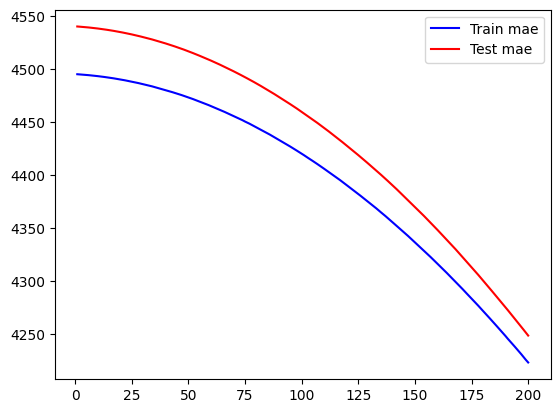

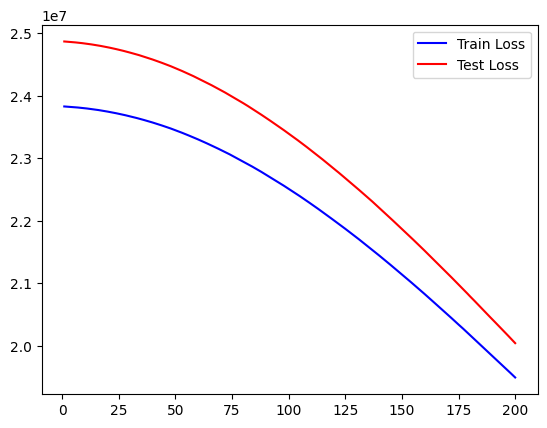

In [17]:
import matplotlib.pyplot as plt

acc = history.history['mae']
val_acc = history.history ['val_mae']
loss = history.history['loss']
val_loss = history.history['val_loss']

epochs = range(1,len(acc)+1)

plt.plot(epochs, acc,'b',label='Train mae')
plt.plot(epochs, val_acc,'r',label='Test mae')
plt.legend()
plt.figure()




plt.plot(epochs, loss,'b',label='Train Loss')
plt.plot(epochs, val_loss,'r',label='Test Loss')
plt.legend()
plt.show()

In [20]:
pip install scikeras

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/


In [21]:
from sklearn.model_selection import GridSearchCV
from scikeras.wrappers import KerasRegressor
from scikeras.wrappers import KerasClassifier
from keras.models import Sequential
from keras.layers import Dense, Dropout
from keras.utils import to_categorical

In [22]:
#Building a linear stack of layers with the sequantial model
def create_model():
  model5 = Sequential()
  model5.add(Dense(200, input_dim = 13, activation = 'relu'))#first hidden layer (need to add input dimension)
  model5.add(Dense(100, activation= 'relu'))# second hidden layer (do not need to add input dimension))
  model5.add(Dense(50, activation= 'relu'))
  model5.add(Dense(10, activation= 'relu'))

  #output layer (Softmax = multinominal)* because of multiclass
  model5.add(Dense(1, activation= 'linear'))

  #Compiling the sequantial model
  model5.compile(loss = 'mse', metrics = ['mae'], optimizer = 'adam')

  return model5

In [23]:
#Create model
model5 = KerasRegressor(model=create_model, loss = 'mse', verbose = 0)

#define the grid search parameters
batch_size = [100,120]
epochs =[10,15,20]
param_grid = dict(batch_size = batch_size, epochs=epochs)
grid = GridSearchCV(estimator=model5, param_grid = param_grid, n_jobs=-1, cv=3)
grid_result = grid.fit(X_train, Y_train)

In [24]:
# summarize results
print("BEST: %f using %s" % (grid_result.best_score_, grid_result.best_params_))
means = grid_result.cv_results_["mean_test_score"]
stds = grid_result.cv_results_["std_test_score"]
params = grid_result.cv_results_['params']
for mean, stdev, param in zip (means, stds, params):
  print ("%f (%f) with : %r" % (mean, stdev, param))

BEST: -4.099898 using {'batch_size': 120, 'epochs': 20}
-5.500586 (0.326240) with : {'batch_size': 100, 'epochs': 10}
-5.175996 (0.419606) with : {'batch_size': 100, 'epochs': 15}
-4.141282 (0.601372) with : {'batch_size': 100, 'epochs': 20}
-5.464659 (0.322400) with : {'batch_size': 120, 'epochs': 10}
-5.168358 (0.255159) with : {'batch_size': 120, 'epochs': 15}
-4.099898 (0.978582) with : {'batch_size': 120, 'epochs': 20}


In [25]:
#Tune the Training Optimization Algorithm (only)
model1 = KerasRegressor (model=create_model, loss = 'mse', epochs=20, batch_size=128, verbose=0)

#Define the grid search parameters
optimizer = ['SGD', 'RMSprop', 'Adagrad','Adadelta','Adam', 'Adamax', 'Nadam']
param_grid = dict (optimizer=optimizer)
grid2 = GridSearchCV (estimator = model1,param_grid=param_grid, n_jobs=-1, cv=3)
grid_result2 = grid2.fit(X_train, Y_train)

In [26]:
# summarize results
print("BEST: %f using %s" % (grid_result2.best_score_, grid_result2.best_params_))
means2 = grid_result2.cv_results_["mean_test_score"]
stds2 = grid_result2.cv_results_["std_test_score"]
params2 = grid_result2.cv_results_['params']
for mean, stdev, param in zip (means2, stds2, params2):
  print ("%f (%f) with : %r" % (mean, stdev, param))

BEST: -3.482910 using {'optimizer': 'Adagrad'}
-4.321107 (0.130818) with : {'optimizer': 'SGD'}
-4.674083 (0.432609) with : {'optimizer': 'RMSprop'}
-3.482910 (0.600279) with : {'optimizer': 'Adagrad'}
-3.791190 (0.654915) with : {'optimizer': 'Adadelta'}
-4.366656 (0.725238) with : {'optimizer': 'Adam'}
-4.592823 (0.533378) with : {'optimizer': 'Adamax'}
-4.443644 (0.280877) with : {'optimizer': 'Nadam'}


In [ ]:
#Function to create model, required KerasClassifier
def create_model2 (activation = 'relu'):
  model6 = Sequential()
  model6.add(Dense(200, input_dim = 13, activation=activation))
  model6.add(Dense(100,activation = activation))
  model6.add(Dense(50, activation=activation))
  model6.add(Dense(10, activation = activation))

  #output layer (Softmax = multinominal)* because of multiclass
  model6.add(Dense(1, activation= 'linear'))

  #Compile model
  model6.compile(loss = 'mse', optimizer='adam', metrics=['mae'])
  return model6

In [ ]:
#create model
model8= KerasRegressor(model= create_model2,loss='mse', epochs=10, batch_size=10, verbose=0)
activation = ['softmax','softplus','softsign', 'relu','tanh', 'sigmoid', 'hard_sigmoid','linear']
param_grid = dict (model__activation=activation)
grid3 = GridSearchCV (estimator=model8, param_grid=param_grid,n_jobs=-1, cv=3)
grid_result3 = grid3.fit(X_train, Y_train)

In [ ]:
#summarize result
print("Best: %f using %s" % (grid_result3.best_score_, grid_result3.best_params_))
means3 = grid_result3.cv_results_['mean_test_score']
stds3 = grid_result3.cv_results_['std_test_score']
params3 = grid_result3.cv_results_['params']
for mean, stdev, param in zip(means3, stds3, params3):
  print("%f (%f) with: %r" % (mean, stdev, param))

Best: 0.407510 using {'model__activation': 'relu'}
-5.817049 (1.096533) with: {'model__activation': 'softmax'}
0.333783 (0.111057) with: {'model__activation': 'softplus'}
-3.518850 (0.678359) with: {'model__activation': 'softsign'}
0.407510 (0.134729) with: {'model__activation': 'relu'}
-3.191288 (0.673793) with: {'model__activation': 'tanh'}
-4.678243 (0.361953) with: {'model__activation': 'sigmoid'}
-4.764032 (1.535079) with: {'model__activation': 'hard_sigmoid'}
0.309503 (0.057805) with: {'model__activation': 'linear'}


Final Model

In [27]:
  modelf = Sequential()
  modelf.add(Dense(200, input_dim = 13, activation = 'relu'))#first hidden layer (need to add input dimension)
  modelf.add(Dense(100, activation= 'relu'))# second hidden layer (do not need to add input dimension))
  modelf.add(Dense(50, activation= 'relu'))
  modelf.add(Dense(10, activation= 'relu'))

  #output layer (Softmax = multinominal)* because of multiclass
  modelf.add(Dense(1, activation= 'linear'))
  

  #Compiling the sequantial model
  modelf.compile(loss = 'mse', metrics = ['mae'], optimizer = 'Nadam')

In [28]:
early_stopping_monitor =EarlyStopping(patience = 6 ) #stop if no improvement after 6 times

historyf = modelf.fit(X_train, Y_train, epochs =20, batch_size = 100, validation_data = (X_test, Y_test), callbacks= [early_stopping_monitor])

Epoch 1/20
6/6 [==============================] - 1s 33ms/step - loss: 23820984.0000 - mae: 4494.5571 - val_loss: 24853826.0000 - val_mae: 4538.8262
Epoch 2/20
6/6 [==============================] - 0s 8ms/step - loss: 23806320.0000 - mae: 4492.9546 - val_loss: 24830774.0000 - val_mae: 4536.3022
Epoch 3/20
6/6 [==============================] - 0s 7ms/step - loss: 23775020.0000 - mae: 4489.5396 - val_loss: 24783002.0000 - val_mae: 4531.1123
Epoch 4/20
6/6 [==============================] - 0s 7ms/step - loss: 23713278.0000 - mae: 4482.7783 - val_loss: 24689140.0000 - val_mae: 4521.0298
Epoch 5/20
6/6 [==============================] - 0s 12ms/step - loss: 23592168.0000 - mae: 4469.9805 - val_loss: 24513786.0000 - val_mae: 4502.5410
Epoch 6/20
6/6 [==============================] - 0s 11ms/step - loss: 23378692.0000 - mae: 4447.4756 - val_loss: 24213242.0000 - val_mae: 4471.3188
Epoch 7/20
6/6 [==============================] - 0s 10ms/step - loss: 23021780.0000 - mae: 4410.1646 - val_l

<Figure size 640x480 with 0 Axes>

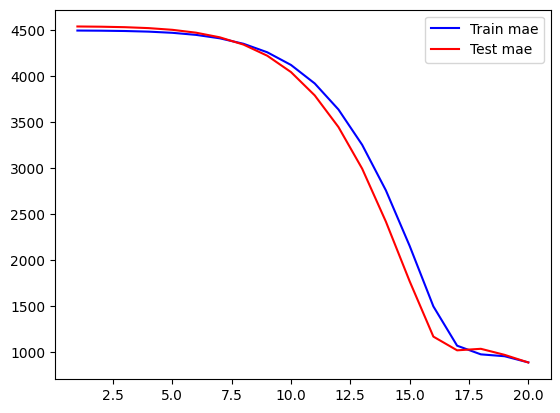

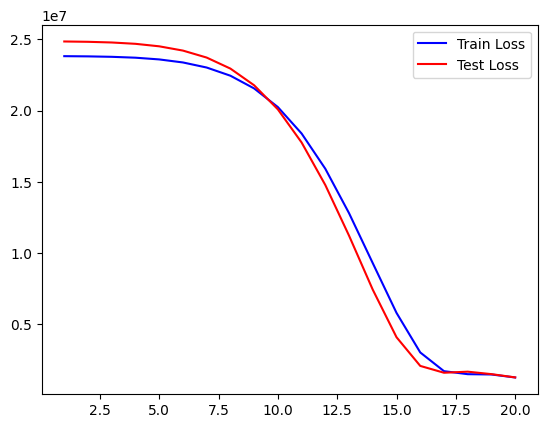

<Figure size 640x480 with 0 Axes>

In [29]:
import matplotlib.pyplot as plt

mae2 = historyf.history['mae']
val_mae = historyf.history['val_mae']
loss2 = historyf.history['loss']
val_loss = historyf.history['val_loss']

epochs = range(1, len(mae2)+1)

plt.plot(epochs, mae2, 'b', label = 'Train mae')
plt.plot(epochs, val_mae, 'r', label = 'Test mae')
plt.legend()
plt.figure()

plt.plot(epochs, loss2, 'b', label = 'Train Loss')
plt.plot(epochs, val_loss, 'r', label = 'Test Loss')
plt.legend()
plt.figure()